##### TO DO NETWORK:
- normal costs
- proper nodes at one-way bridges, adding bridges to network

#### TO DO VESSELS:
- Attribute "Cost" on network vs distance function
- It starts logging after the first step, so start position is not included in the logs, only the position at t=1, not at t=0
- IDEA: let the path be found based on edge attribute. For example, create a special note attribute for cruisevessel, set dijkstra based on that attribute for specific round, and in the rest of the network set that specific note attribute to extremely high. Than dijkstra will choose the shortest route!



### Update
- Animation function; 'making a movie' -> way faster than putting it in HTML
- Time table distribution for RCV, 




In [1]:
%load_ext autoreload
%autoreload 2
import time
import random
# import geopandas as gpd
import networkx as nx
#import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
# from shapely.geometry import Point
from matplotlib import animation
from JSAnimation import IPython_display
%matplotlib inline

import matplotlib.pylab as plt





In [2]:
#Show with attributes 
#graph = gpd.read_file(''../Canal_Network_Shapefiles/edges_water_2.shp')
#print(graph.iloc[3]['cost'])
#print(graph.head()) # see what attrinutes the edges and nodes from the shapefile contain

## Generate Graph

In [3]:
G=nx.read_shp('../Canal_Network_Shapefiles/edges_water_2.shp', simplify=True) # use simplify is true otherwise chart get shifted
w_G = nx.Graph()

color_map = []
lat_lon_to_index = {}

for i, node in enumerate(G.nodes()): #adds nodes with label 1 till n nodes to the network. 
    w_G.add_node(i, pos= node)
    lat_lon_to_index[node] = i
    color_map.append('b')
    
for edge in G.edges(data=True): # adds edges with attributes to the graph from shapefile according to the order in which the edges are ordered in the shapefile
    w_G.add_edge(lat_lon_to_index[edge[0]], lat_lon_to_index[edge[1]], dis=edge[2]['cost'], width =edge[2]['width']  )

    
c = list(w_G.nodes)
j = list(w_G.edges(data=True))
#print(j)
#print(len(c))
#print(len(j))
    
#w_G = G.to_directed()

#nodelist omzetten naar pandas dataframe omdat zodat hij veel makkelijker en sneller de coordinaten van de nodes kan opzoeken
#pandas >>> nx.get_node_attributes kwa snelheid

graph_df = pd.DataFrame.from_dict(nx.get_node_attributes(w_G, 'pos'), orient='index', columns=["lat", "long"]) 

In [4]:
#plt.figure(figsize=(18,18))
#nx.draw(w_G, nx.get_node_attributes(w_G, 'pos'), with_labels=True, node_size=0.5, font_size = 0.1)
#plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals_newgraph.pdf', format='pdf', rasterized=False)
#plt.show()

## Path generator; Tour Vessels

In [5]:
cruise_vessel_routes_pd = pd.read_excel('./schema.xlsx', index_col = 'NAAM')
cruise_vessel_routes_pd = cruise_vessel_routes_pd.fillna("empty")

dict_waypoints={}
for i in cruise_vessel_routes_pd.index.tolist():
    dict_waypoints[i] = [int(x) for x in cruise_vessel_routes_pd.loc[:, 'NODES':].loc[i].tolist() if x != 'empty']
#print(dict_waypoints)


dict_routes = {}
for i in dict_waypoints:
    route = []
    total_route = []
    for x, j in enumerate(dict_waypoints[i][:len(dict_waypoints[i]) - 1]):
        l = nx.dijkstra_path(w_G,dict_waypoints[i][x] , dict_waypoints[i][x+1], weight = 'dis')
        route.append(l[:-1])
    route.append([route[0][0]])
    #print(route)
    for r in route:
        total_route += r
    dict_routes[i] = total_route
    
    


## Path generator; Random Tour Vessels

In [6]:
#max time for each round = 1;15 h
round_time = (75*60) / 10


dict_start_points={
    'prinsengracht' : 775,
    'rijksmuseum':1488,
    'annefrank': 1108,
    'damrak': 3107,
    'stationsplein': 3772
}




dict_attractions ={
    'goudenbocht' : [1529, 1825, 2518, 2542, 2744, 3095, 3152, 3435],
    'annefrank' : [1173],
    'magerebrug': [3731],
    'redlightdistrict' : [2616, 2707, 3099, 3357, 3385],
    'prinsengracht' : [1055, 966, 830, 731],
    'artis' : [4841,4914, 4817, 4741, 4690],
    'rijksmuseum' : [1613, 1486],
    'stnicolaasbassilica' : [4422],
    'scheepsvaartmuseum' : [4652, 4630],
    'rembrandhuisenwaterlooplein' : [3367, 3285],
    'negenstraatjes' : [1334, 1297, 1255, 1181, 1136]  
}



def route_planner():
    
    
    sightseeing_sample = random.sample(list(dict_attractions), 3)
    startpoint = random.sample(list(dict_start_points), 1)
    print('st', startpoint)
    print('sam', sightseeing_sample)
    startpoint_node = dict_start_points[startpoint[0]]
    check_list = []
    check_list+=startpoint
    check_list+=sightseeing_sample
    print('checklist:', check_list)
    """
    errorlist_1 = ['annefrank','goudenbocht', 'rembrandhuisenwaterlooplein', 'magerebrug']
    errorlist_2 = ['prinsengracht''goudenbocht', 'rembrandhuisenwaterlooplein', 'negenstraatjes']  
    errorlist_3 = ['annefrank', 'rijksmuseum', 'prinsengracht', 'negenstraatjes']
    errorlist_4 = ['damrak','magerebrug', 'rembrandhuisenwaterlooplein', 'negenstraatjes']
    errorlist_5 = ['damrak','rembrandhuisenwaterlooplein', 'magerebrug', 'annefrank']
    errorlist_6 = ['rijksmuseum','negenstraatjes', 'prinsengracht', 'annefrank']
    errorlist_7 = ['prinsengracht','goudenbocht', 'magerebrug', 'annefrank']

    
    while startpoint[0] in sightseeing_sample or check_list == errorlist_1 or check_list == errorlist_2 or check_list == errorlist_3 or check_list == errorlist_4 or check_list == errorlist_5 or check_list == errorlist_6  or check_list == errorlist_7:
        sightseeing_sample = random.sample(list(dict_attractions), 3) 
        startpoint = random.sample(list(dict_start_points), 1)
        check_list = []
        check_list+=startpoint
        check_list+=sightseeing_sample
        print('checklist:', check_list)
        #if check_list == errorlist_1 or errorlist_2:
         #   sightseeing_sample = random.sample(list(dict_attractions), 3)
          #  startpoint = random.sample(list(dict_start_points), 1)
           # check_list = []
            #check_list+=startpoint
            #check_list+=sightseeing_sample
            #print('checklist:', check_list)
   
        #elif check_list == 
    """    
    

    
    print("attractions selected :", sightseeing_sample)
    print("startpoint :", startpoint, startpoint_node )


    #print(startpoint_node)
    nodes_for_sightseeingpath= []
    for i in sightseeing_sample:
        nodes_for_sightseeingpath.append(dict_attractions[i])
    #print(nodes_for_sightseeingpath)


    list1= []
    list1.append(startpoint_node)
    for i in nodes_for_sightseeingpath:
        list1 +=i



    # create distance dataframe for distance maxtrix
    tsp_pd = pd.DataFrame(np.zeros([len(list1), len(list1)]))
    tsp_pd.columns = list1
    tsp_pd.index = list1

    #fill distance dataframe with shortest path distances to each node
    for i in list1:
        for j in list1:
            if j == i:
                next
            else:
                h = nx.dijkstra_path_length(w_G, i, j, weight = 'dis')#totale lengte nodig, geen dijkstra
                #h = nx.shortest_path_length(w_G, i, j, weight = 'dis')#totale lengte nodig, geen dijkstra
                #tsp_pd[i].loc[j] = h
                tsp_pd.at[i, j ] = h


    #create distance matrix as input for OR solver
    total_list =[]

    for i in tsp_pd.index:
        temp_list =[]
        for j in tsp_pd.columns:
            #temp_list.append(tsp_pd[j].loc[i])
            temp_list.append(tsp_pd.at[j, i ])
        total_list.append(temp_list)
        temp_list =[]



    #Google OR solver
    from ortools.constraint_solver import pywrapcp
    from ortools.constraint_solver import routing_enums_pb2

    # Distance callback
    def create_distance_callback(dist_matrix):
      # Create a callback to calculate distances between cities.

      def distance_callback(from_node, to_node):
        return int(dist_matrix[from_node][to_node])

      return distance_callback
    global total_distance_route
    total_distance_route = 0
    global route_total
    global tsp_waypoints
    route_total =[]

    def main():
      # Cities
      city_names = list1
      # Distance matrix
      dist_matrix = total_list

      tsp_size = len(city_names)
      num_routes = 1
      depot = 0

      # Create routing model
      if tsp_size > 0:
        routing = pywrapcp.RoutingModel(tsp_size, num_routes, depot)
        search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
        # Create the distance callback.
        dist_callback = create_distance_callback(dist_matrix)
        routing.SetArcCostEvaluatorOfAllVehicles(dist_callback)
        # Solve the problem.
        assignment = routing.SolveWithParameters(search_parameters)
        if assignment:
          # Solution distance.
          print ("Total distance: " + str(assignment.ObjectiveValue()) + " meters\n")
          global total_distance_route
          total_distance_route += assignment.ObjectiveValue()
          # Display the solution.
          # Only one route here; otherwise iterate from 0 to routing.vehicles() - 1
          route_number = 0
          index = routing.Start(route_number) # Index of the variable for the starting node.
          route = ''
          while not routing.IsEnd(index):
            # Convert variable indices to node indices in the displayed route.
            route += str(city_names[routing.IndexToNode(index)]) + ' -> '
            index = assignment.Value(routing.NextVar(index))
          route += str(city_names[routing.IndexToNode(index)])
        #jeroen: added this part to convert output into list for creating workable path
          num_list = route.split('->')
          route_total.append( [int(x) for x in num_list])
          #print(integers_1)
          integs = [int(x) for x in route.split('->')]
          #print(integs)
          #print ("Route:\n\n" + route)

          #route_total.append(route)
        else:
          print ('No solution found.')
      else:
        print ('Specify an instance greater than 0.')

    if __name__ == '__main__':
      main()

    #create route from waypoints as input for random cruise vessels
    [tsp_waypoints] = route_total


In [7]:
route_planner()
while total_distance_route > round_time * 13.89: #must be under route time
    route_planner() 
    
tsp_path_total = []
for x in range(len(tsp_waypoints) - 1):
    n = nx.dijkstra_path(w_G,tsp_waypoints[x] , tsp_waypoints[x+1], weight = 'dis')
    tsp_path_total += n

st ['annefrank']
sam ['negenstraatjes', 'scheepsvaartmuseum', 'rembrandhuisenwaterlooplein']
checklist: ['annefrank', 'negenstraatjes', 'scheepsvaartmuseum', 'rembrandhuisenwaterlooplein']
attractions selected : ['negenstraatjes', 'scheepsvaartmuseum', 'rembrandhuisenwaterlooplein']
startpoint : ['annefrank'] 1108
Total distance: 7192 meters

st ['prinsengracht']
sam ['rembrandhuisenwaterlooplein', 'negenstraatjes', 'annefrank']
checklist: ['prinsengracht', 'rembrandhuisenwaterlooplein', 'negenstraatjes', 'annefrank']
attractions selected : ['rembrandhuisenwaterlooplein', 'negenstraatjes', 'annefrank']
startpoint : ['prinsengracht'] 775
Total distance: 5206 meters



## Vessel Base Class

In [8]:
class Vessel(object):
    def __init__(self, start, end):
        """
        Baseclass Vessel kan worden overschreven door nieuwe __init__ aan te maken. 
        Dan moet je wel alle waardes opnieuw bepalen, dus zorg dat je goed copy pasted en alleen de waardes veranderd die
        je wilt veranderen. In dit geval dat het start en eind punt dus bepaald zijn, en dus niet meer als input moet worden gegeven
        omdat het pad al bepaald is. 
        """
        self.start = start#; Moeten in child classes wel worden gedefinieerd, anders doen deze schepen het niet.
        self.end = end
        self.path = self.route(w_G,self.start, self.end)
        self.coor_log = []
        self.vessel_pos = (graph_df['lat'].loc[self.path[0]], graph_df['long'].loc[self.path[0]]) # nx.get_node_attributes(w_G, 'pos')[self.path[0]] 
        self.w_G = w_G
        self.to_node_id = 1
        self.move = 3 #aanpassen vooor de tijdsstap, nu  in m/s, en pas aan voor overshoot. 
        self.travel_time = 0
        self.active = True
        self.coor_log_x =[]
        self.coor_log_y=[]
        #self.start_time = simulation.step_count
        

    def route(self, w_G, start, end):
        return nx.dijkstra_path(w_G, start, end, weight = 'dis')
    
    
    def calculate_distance(self, Node1, Node2):
        # calculate distance between two points
        distance = float(((Node2[0]-Node1[0])**2+(Node2[1]-Node1[1])**2)**0.5)
        return float(distance)
    

    def calculate_angle(self, Node1, Node2):
        # calculate angle going from point 1 to point 2 (NB: atan2(y,x))
        angle =  (float(math.atan2(Node2[1]-Node1[1],Node2[0]-Node1[0]))) #*float((180.0 / math.pi)) for degrees
        return float(angle)
        

    def pos_next_step(self, Node1, Node2, move):#move cannot be replaced by self.move because move may change by 'remaining_move'
        # move towards Node2
        distance = self.calculate_distance(Node1, Node2) #wordt dit wel hier gebruikt?
        angle = self.calculate_angle(Node1, Node2)
        new_node = (float(Node1[0]+math.cos(angle)*move), float(Node1[1]+math.sin(angle)*move))
        return new_node

    
    def move_on_path(self):
        # 1. vessel_pos is your boat
        # 2. you need to know the next node in the path
        # 3. calculate the distance between Node1 and the next node
        
        if self.active == True: #start logging  each step of vessel;
            
            to_node_pos = (graph_df['lat'].loc[self.path[self.to_node_id]], graph_df['long'].loc[self.path[self.to_node_id]])
            distance_to_next_node = self.calculate_distance(self.vessel_pos, to_node_pos)

            # If move <= distance to next node, make move
            if self.move < distance_to_next_node:
                    vessel_pos_new = self.pos_next_step(self.vessel_pos, to_node_pos, self.move)
                    self.travel_time+=1

            else:
                if self.to_node_id == len(self.path)-1:
                    self.active = False #stop logging if vessel arrives at destination
                    vessel_pos_new = to_node_pos  
                    self.travel_time +=1 # klopt dit dan nog?
                else:
                    # reposition vessel at next node and calculate remaining move distance
                    self.vessel_pos = (graph_df['lat'].loc[self.path[self.to_node_id]], graph_df['long'].loc[self.path[self.to_node_id]])

                    # up the to_node_id with 1 and find new to_node_pos
                    self.to_node_id+=1
                    
                    # calculate distance to next node
                    remaining_move = float(self.move-distance_to_next_node)
                    
                    #updates new distance to next node
                    to_node_pos = (graph_df['lat'].loc[self.path[self.to_node_id]], graph_df['long'].loc[self.path[self.to_node_id]])
                    distance_to_next_node = self.calculate_distance(self.vessel_pos, to_node_pos)
                    
                    #checks for 'overshoot', if remaining distance > next distance, place on next node and check again till condition is no longer valid
                    while remaining_move > distance_to_next_node:
                        self.vessel_pos = (graph_df['lat'].loc[self.path[self.to_node_id]], graph_df['long'].loc[self.path[self.to_node_id]])
                        remaining_move = float(remaining_move-distance_to_next_node)
                        
                        # if statement to check if it is on end of path (last point of path could be couple of nodes which lengt < move)
                        #otherwise, node_id > len of path and can;t compute
                        if self.to_node_id == len(self.path)-1:
                            self.active = False #stop logging if vessel arrives at destination
                            vessel_pos_new = to_node_pos  
                            self.travel_time +=1
                            break
                            
                        self.to_node_id+=1
                        
                        #vessel is placed on new node, now update distance to next node 
                        to_node_pos = (graph_df['lat'].loc[self.path[self.to_node_id]], graph_df['long'].loc[self.path[self.to_node_id]])
                        distance_to_next_node = self.calculate_distance(self.vessel_pos, to_node_pos)
                        
                    vessel_pos_new = self.pos_next_step(self.vessel_pos, to_node_pos, remaining_move)
                    self.travel_time+= 1   
                    
            #updates position of vessel
            self.vessel_pos = vessel_pos_new
            
            #adds new positions to log
            self.coor_log.append(self.vessel_pos) #library for tuple (x,y) coordinate of the vessel
            self.coor_log_x.append(self.vessel_pos[0]) # library for only x coordinates
            self.coor_log_y.append(self.vessel_pos[1])# library for only y coordinates
            


## Vessel sub-categories

In [9]:
class Cruise_Vessel(Vessel):

     #TODO: is het niet beter baseclass aan te passen zodat er geen start, end is gedefinieerd?
    def __init__(self):
        #self.start = doesn't have one hardcoded, reads one from excel file
        #self.end = doesn't have one hardcoded, reads one from excel file
        self.path = dict_routes['css1'] #path bij init, zodat simulator classe dat zelf kan bepalen
        self.coor_log = []
        self.vessel_pos = (graph_df['lat'].loc[self.path[0]], graph_df['long'].loc[self.path[0]]) #start position
        self.to_node_id = 1
        self.move = 16.67 #aanpassen vooor de tijdsstap, nu  in m/s, en pas aan voor overshoot. 
        self.travel_time = 0
        self.active = True
        self.coor_log_x =[]
        self.coor_log_y=[]

    #def starttime? Of moet die in de simulator class worden gedaan? -> Simulator classe
        

In [10]:
class Random_Cruise_Vessel(Vessel):
    def __init__(self):
        
        self.path = tsp_path_total
        self.vessel_pos = (graph_df['lat'].loc[self.path[0]], graph_df['long'].loc[self.path[0]]) #start position
        self.to_node_id = 1
        self.move = 13.89 #aanpassen vooor de tijdsstap, nu  in m/s, en pas aan voor overshoot. 
        self.travel_time = 0
        self.active = True
        self.coor_log_x =[]
        self.coor_log_y=[]
        self.coor_log = []
    

     #TODO: is het niet beter baseclass aan te passen zodat er geen start, end is gedefinieerd?
      
    def route(self, w_G, start, end):
        pass
        
     
        
        
        
        
    #insert logica for touristiness certain edges
    
    
    
    

In [11]:
class Pleasure_Craft(Vessel):
    
    #TODO: is het niet beter baseclass aan te passen zodat er geen start, end is gedefinieerd?
    def __init__(self):
        self.path = self.route(w_G,random.sample(w_G.nodes, 1)[0], random.sample(w_G.nodes, 1)[0])
        self.start = self.path[0]
        self.end = self.path[len(self.path)-1]
        self.coor_log = []
        self.vessel_pos = nx.get_node_attributes(w_G, 'pos')[self.path[0]] 
        self.w_G = w_G
        self.to_node_id = 1
        self.move = 3.0 #aanpassen vooor de tijdsstap, nu  in m/s, en pas aan voor overshoot. 
        self.travel_time = 0
        self.active = True
        self.coor_log_x =[]
        self.coor_log_y=[]

        #def route(self, w_G, start, end):
        #return random.sample(nx.all_simple_paths(w_G, start, end, cutoff=None))
        #nx.all_simple_paths(w_G, start, end, cutoff=None)[0]
     
        
        

## SIMULATOR CLASS

In [12]:
class Simulation():
    def __init__(self):
        self.stepsize = 10
        self.sim_steps = 1000 #int((24*60*60)/self.stepsize)
        self.vessel_count = 10
        self.ves_list = [] #list of active vessel
        self.start_time_list = [] # list for starttimes for vessel for pd.dataframe
        self.druktelijst_rtv = [0,0,0,0,0,15,16,17,27,28,38,47,46,45,44,47,37,28,25,34,12,11,5,3] #from excel?
        self.druktelijst_pc = [0,0,0,0,0,15,16,17,27,28,38,47,46,45,44,47,37,28,25,34,12,11,5,3] #from excel?
        self.distr = self.distr_gen() #chance generator for distribution of vessel of a given day, can be modified to represent different scenarios
        self.distr_rtv = self.distr_gen_from_distr_list(self.druktelijst_rtv)
        self.distr_pc = self.distr_gen_from_distr_list(self.druktelijst_pc)
        self.step_count = 0
        
        
    def run_full_sim(self):
        for i in range(self.sim_steps):
            self.one_sim_step()
            print(i)
        #print("simlation time: {} s".format(time.time() - self.start_time)) 
        #Create pandas dataframe of vessels log' for plotting purposes.
#         self.df = pd.DataFrame(np.zeros([self.sim_steps, len(self.ves_list)]))# generate dataframe based on rows: # steps ; colums: # vessels
        self.x_df = pd.DataFrame(np.zeros([self.sim_steps, len(self.ves_list)]))
        self.y_df = pd.DataFrame(np.zeros([self.sim_steps, len(self.ves_list)]))
        
        
        #self.from_df = pd.DataFrame(np.zeros([self.sim_steps, len(self.ves_list)]))
        
        for i, time, ves in zip(range(len(self.ves_list)), self.start_time_list, self.ves_list):
            
            #creates dataframe for x coordinates and one for y coordinates based on vessel logs
            ds_x = pd.Series(np.array(ves.coor_log_x, dtype = np.float64))
            ds_y = pd.Series(np.array(ves.coor_log_y, dtype = np.float64))
        
            
            """only adds coordinates stamps as column in data frame based on timestep in start_time_list; so if a vessel is generated in timestep 20 and
            logs every step and arrives at timestep 30, the coordinates of the timesteps 20 untill 30 are added to the dataframe
            on row 20 untill 30. """
            
            self.x_df[i].iloc[time : time + len(ds_x)] = ds_x.values
            self.y_df[i].iloc[time : time + len(ds_y)] = ds_y.values
            #self.x_df.at[i, time : time + len(ds_x) ] = ds_x.values
            #self.y_df.at[i, time : time + len(ds_x) ] = ds_y.values
            
            #self.x_df[i].at[time : time + len(ds_x)] = ds_x.values
            #self.y_df[i].at[time : time + len(ds_y)] = ds_y.values
            
            
            
            #replaces values of 0 to nan for plotting purposes
            self.x_df = self.x_df.replace(0.0, np.nan) 
            self.y_df = self.y_df.replace(0.0, np.nan)
        
    def one_sim_step(self):
         #definieerd verschillende schepen met schillende routes en starttijden.
        
        #for x in range(self.distr[self.step_count]):# generates list of number of boats to be generated for a timestep
            
         #   self.ves_list.append(Cruise_Vessel())
          #  self.start_time_list.append(self.step_count) # Generate list of starttimes whenever a vessel is generated for pd.DataFrame
            
        for y in range(self.distr_rtv[self.step_count]):
            
            self.ves_list.append(Random_Cruise_Vessel())
            self.start_time_list.append(self.step_count)
        
        #for z in range(self.distr_pc[self.step_count]):
            
         #   self.ves_list.append(Pleasure_Craft())
          #  self.start_time_list.append(self.step_count)
            
        
        for ves in self.ves_list:
            ves.move_on_path()
        
        self.step_count += 1

        
   
    def distr_gen(self): # voeg boot toe met bepaalde kans 
        threshold = self.vessel_count / float(self.sim_steps)
        count_list = []
    
        # maakt lijst met hoeveel boten er spawnen op elke tijdstap
        for i in range(self.sim_steps):
            counter = 0
            
            while True:
                nummer = random.random()
                if nummer < threshold:
                    counter += 1
                else:
                    break
            count_list.append(counter)
        #print (count_list)
        return count_list
    
    
    def distr_gen_from_distr_list(self, druktelijst):
        start_time = time.time()
        
        te_returnen_lijst = []
        for uurdrukte in druktelijst:

            uurlijst = list(np.zeros(round(self.sim_steps/len(druktelijst)), dtype = int))
            for i in range(uurdrukte):
                uurlijst[random.choice(range(len(uurlijst)))] += 1
            te_returnen_lijst += uurlijst
     
        if self.sim_steps > len(te_returnen_lijst):
            for i in range(self.sim_steps - len(te_returnen_lijst)):
                te_returnen_lijst.append(0)
                
        elif len(te_returnen_lijst) > self.sim_steps:
            te_returnen_lijst = te_returnen_lijst[:len(te_returnen_lijst) - (len(te_returnen_lijst) - self.sim_steps)]
            
        return te_returnen_lijst


  

## Start Simulation(s)

In [13]:
start_time = time.time()
simulation = Simulation()
simulation.run_full_sim()
print("Simulation : {} s".format(time.time() - start_time))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Checks log of vessel if needed

In [14]:
#simulation.x_df #Log of route 

## Animator + Plot of routes


<IPython.core.display.Javascript object>


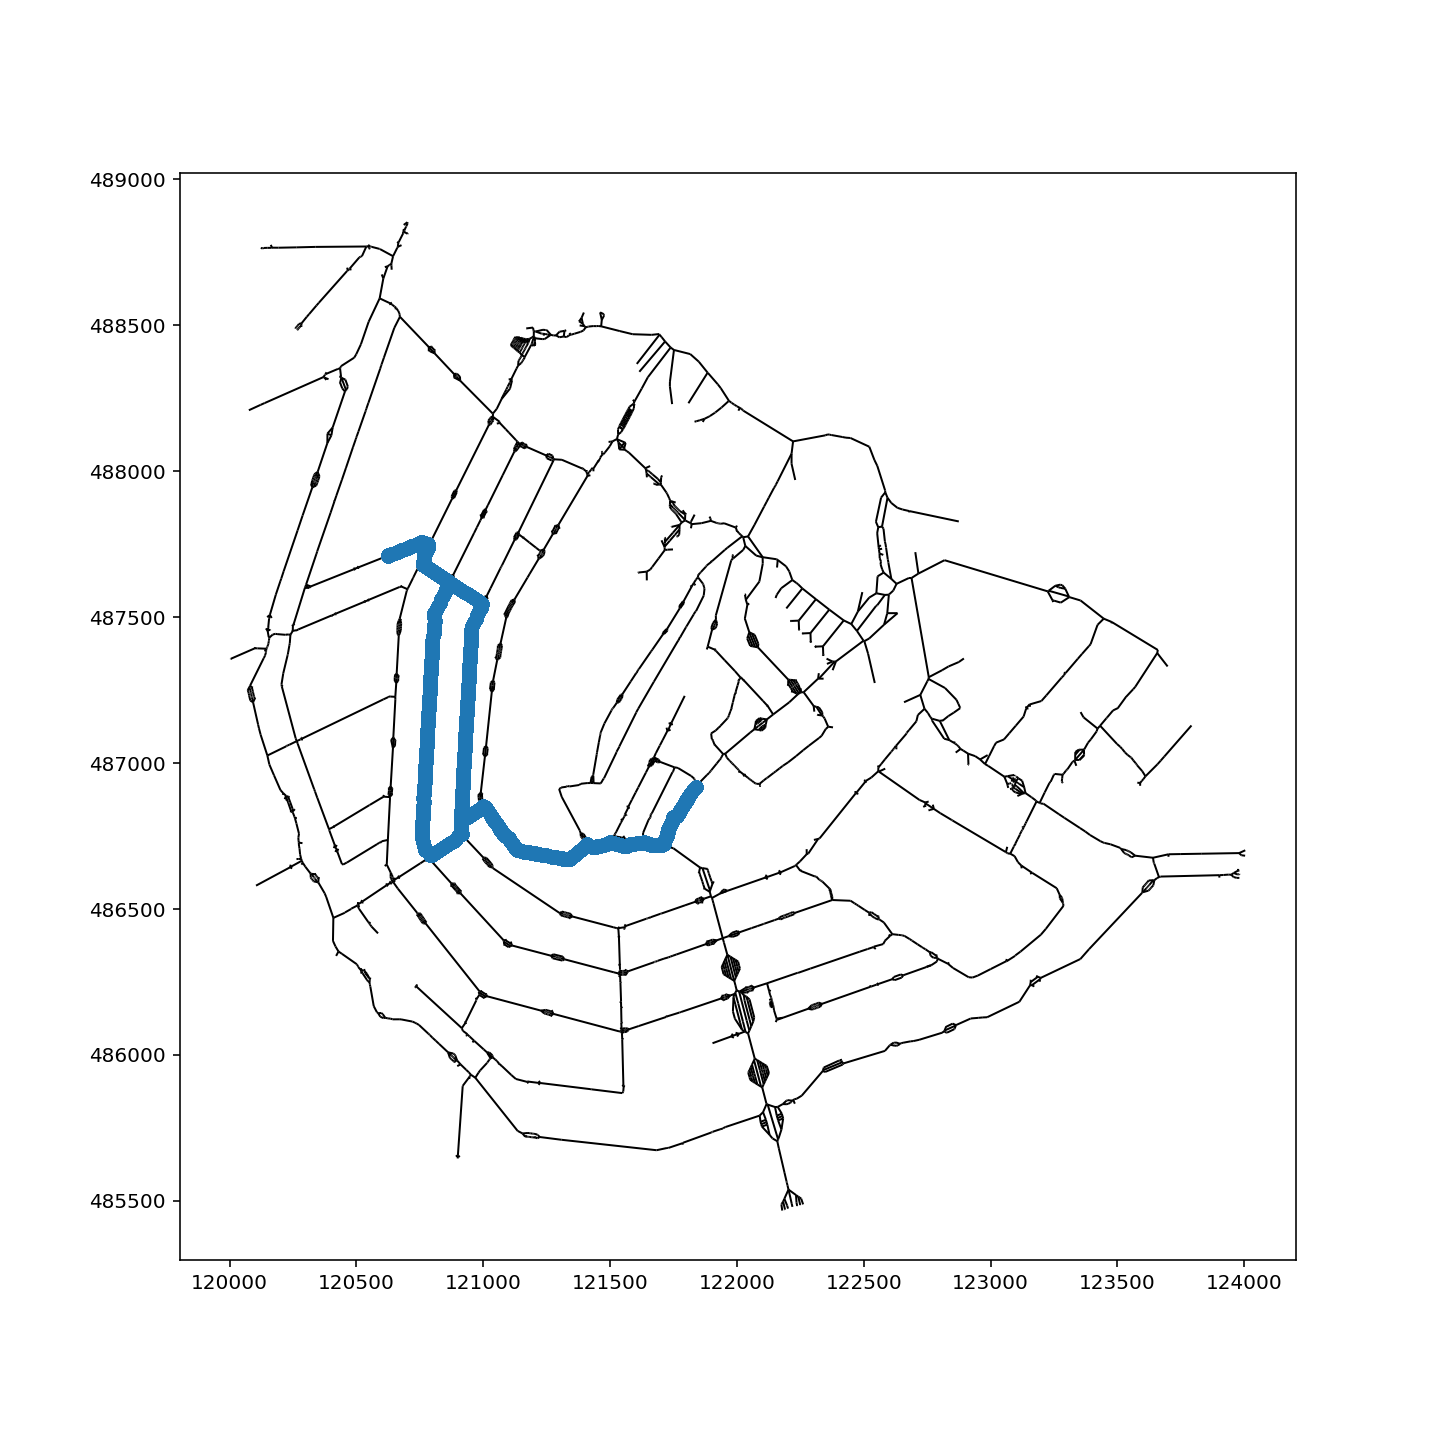

/Users/JeroenvanderDoes/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
nx.draw_networkx_edges(w_G,nx.get_node_attributes(w_G, 'pos'))
plt.scatter(simulation.x_df,simulation.y_df)
#plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals_11.pdf', format='pdf', rasterized=False)
plt.show()


In [16]:

"""
start_time = time.time()

def get_data_x(i):
    return simulation.x_df.loc[i]

def get_data_y(i):
    return simulation.y_df.loc[i]

def animate(i):
    x = get_data_x(i)
    y= get_data_y(i)   
    graph.set_data(x,y)
    return graph,

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(20,20))
ax = plt.axes()

nx.draw(w_G,nx.get_node_attributes(w_G, 'pos'),node_size = 0.1)

n_steps = simulation.x_df.index 

graph, = plt.plot([],[],'o')

ani = animation.FuncAnimation(fig, animate, frames= n_steps, interval=1, repeat=True, blit = True)
ani.save('/Users/JeroenvanderDoes/Downloads/canals_test2.mp4', writer=writer)

print("Animator : {} s".format(time.time() - start_time))
"""

'\nstart_time = time.time()\n\ndef get_data_x(i):\n    return simulation.x_df.loc[i]\n\ndef get_data_y(i):\n    return simulation.y_df.loc[i]\n\ndef animate(i):\n    x = get_data_x(i)\n    y= get_data_y(i)   \n    graph.set_data(x,y)\n    return graph,\n\n# Set up formatting for the movie files\nWriter = animation.writers[\'ffmpeg\']\nwriter = Writer(fps=15, metadata=dict(artist=\'Me\'), bitrate=1800)\n\nfig = plt.figure(figsize=(20,20))\nax = plt.axes()\n\nnx.draw(w_G,nx.get_node_attributes(w_G, \'pos\'),node_size = 0.1)\n\nn_steps = simulation.x_df.index \n\ngraph, = plt.plot([],[],\'o\')\n\nani = animation.FuncAnimation(fig, animate, frames= n_steps, interval=1, repeat=True, blit = True)\nani.save(\'/Users/JeroenvanderDoes/Downloads/canals_test2.mp4\', writer=writer)\n\nprint("Animator : {} s".format(time.time() - start_time))\n'